In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from wrangle import clean_and_convert, train_val_test
from explore import plot_variable_pairs, hypothesis_test, plot_categorical_and_continuous_vars

# Exploration

In [20]:
df = clean_and_convert()
df.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


In [21]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

3) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


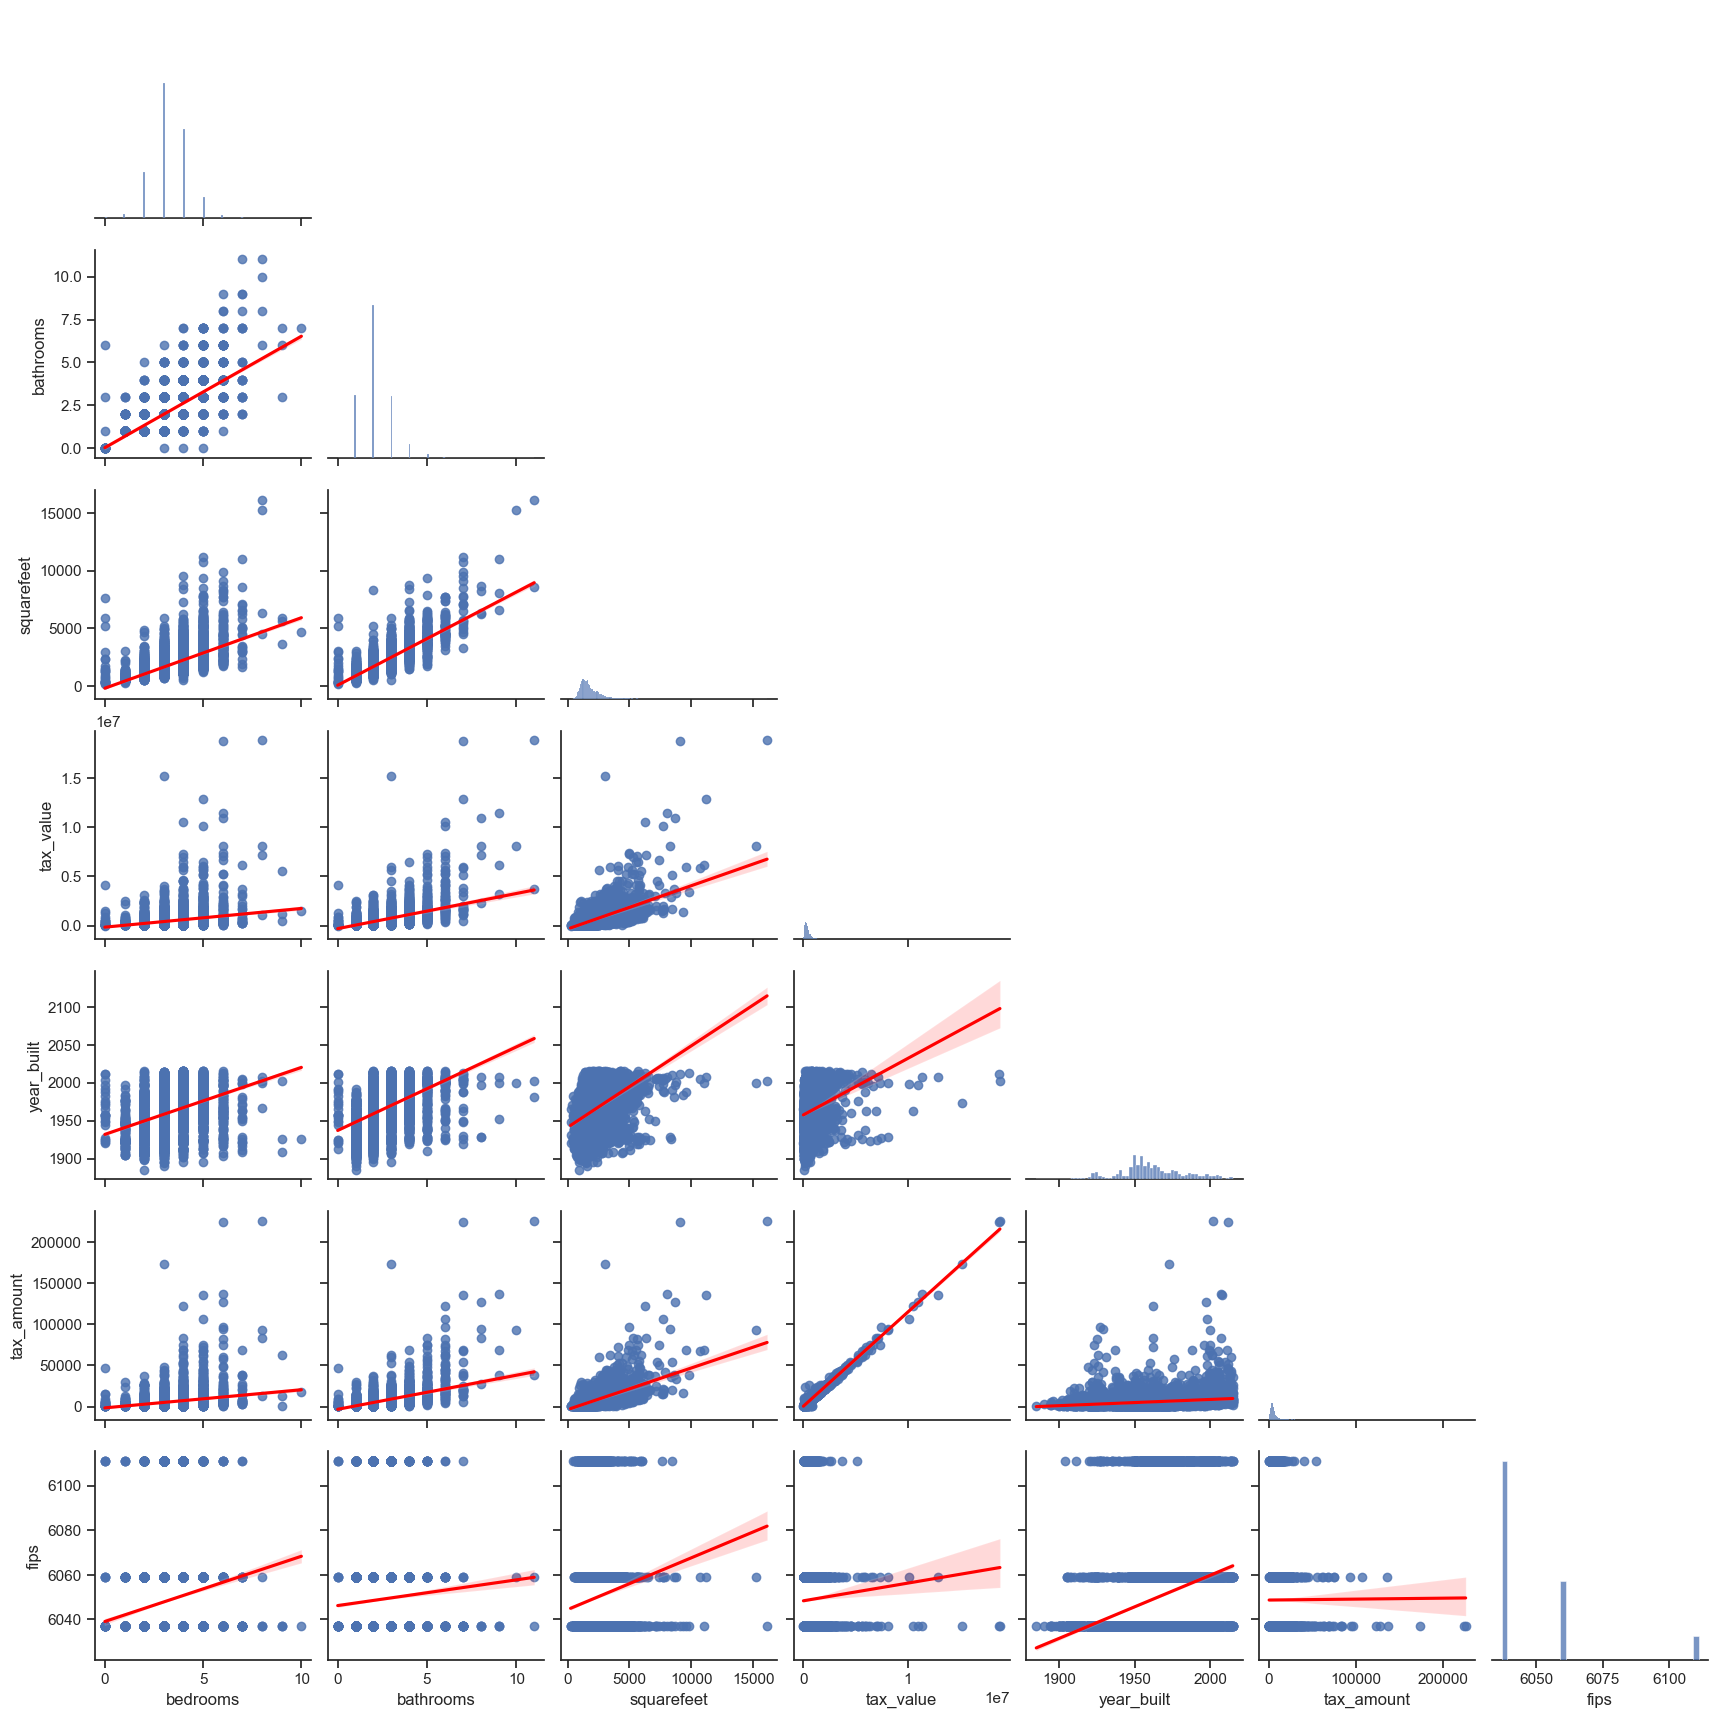

In [22]:
plot_variable_pairs(train)

4) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5) Save the functions you have written to create visualizations in your explore.py file.  
   Rewrite your notebook code so that you are using the functions imported from this file.

6) Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

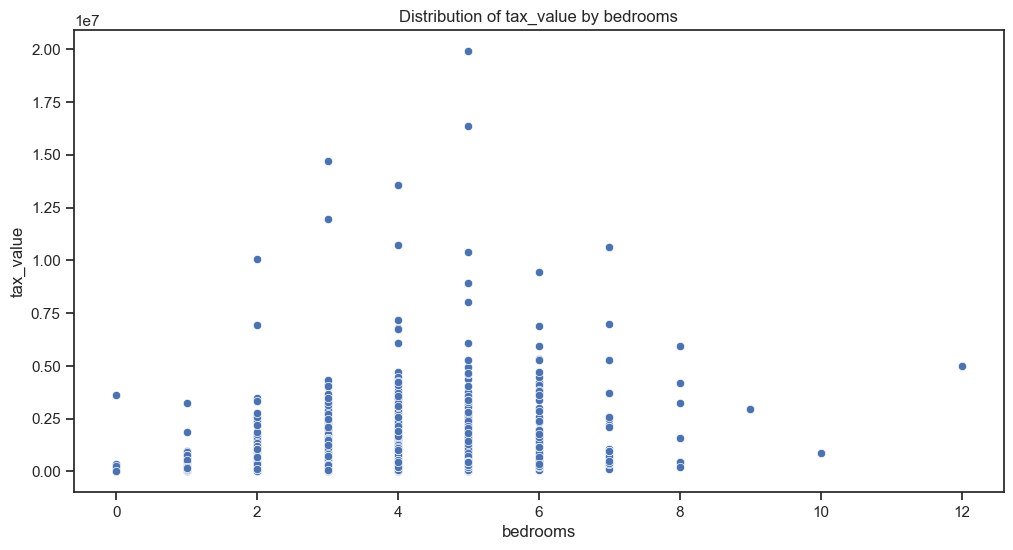

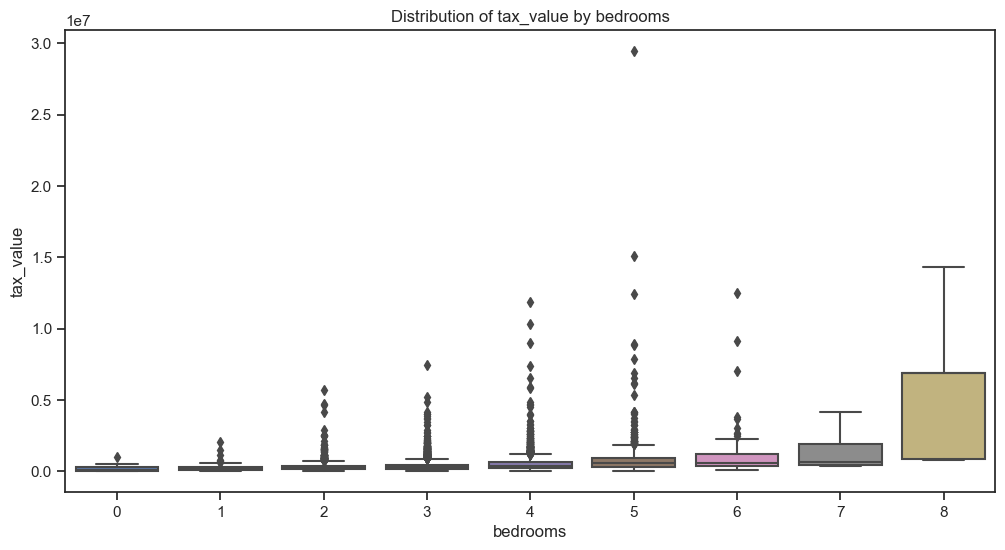

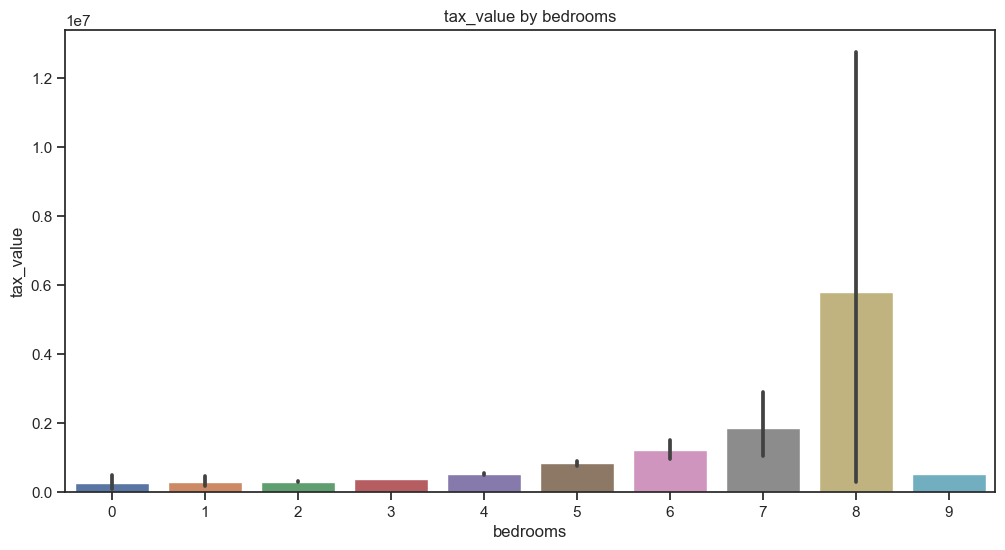

In [33]:
#Calling the plot_categorical_and_continuous_vars function to visualize the relationship betweem b and tax_value
plot_categorical_and_continuous_vars(train, categorical_col = 'bedrooms', continuous_col = 'tax_value')

7) Come up with some initial hypotheses based on your goal of predicting property value.

### 1st Hypothesis

#### Does tax amount affect tax value?

Null hypothesis: Tax amount does not have a relationship with tax value.  
Alternative hypothesis: Tax amount has a direct relationship with tax value.

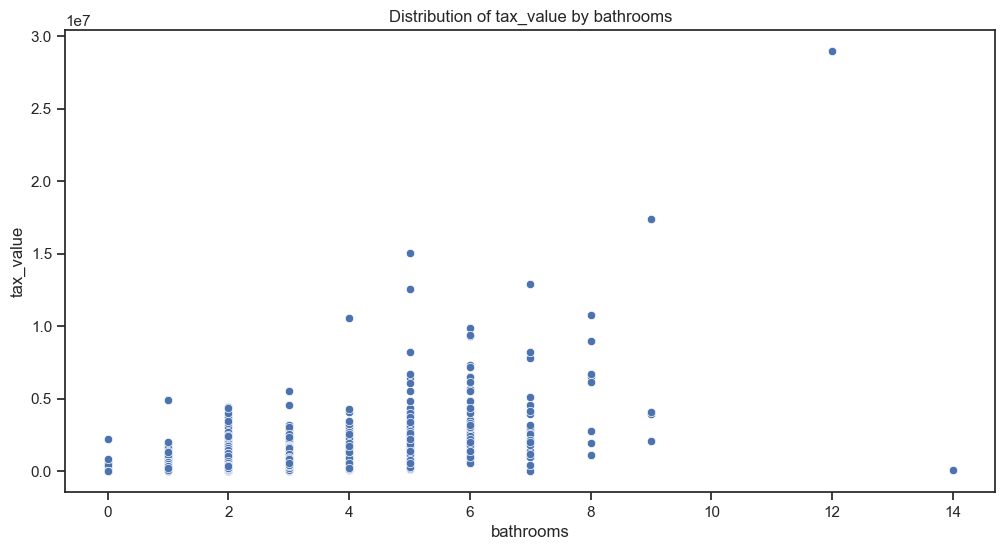

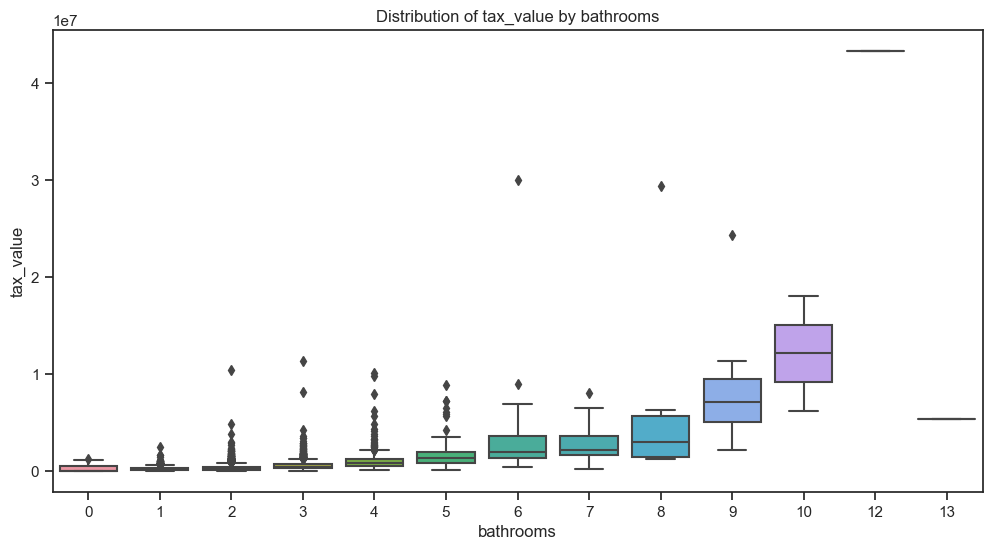

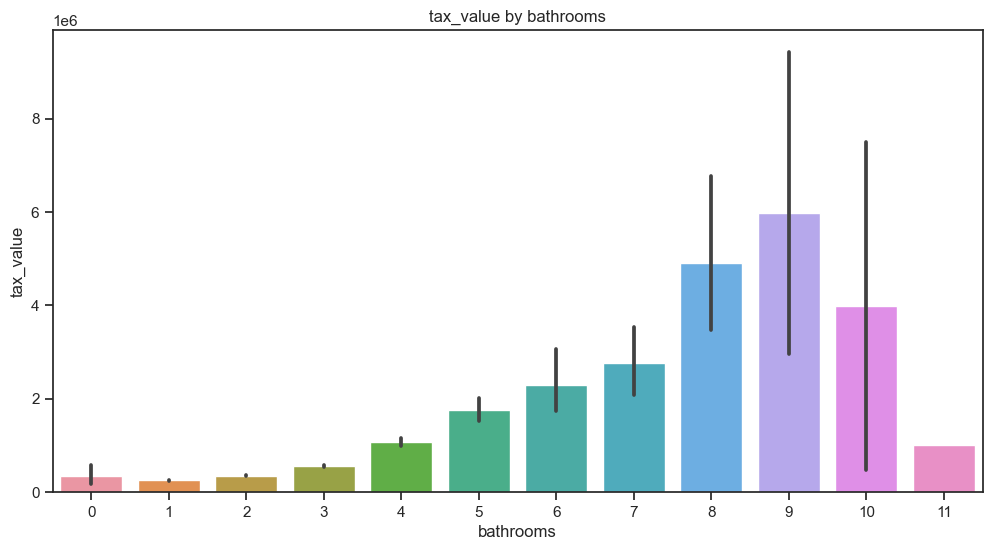

In [24]:
#Calling the plot_categorical_and_continuous_vars function to visualize the relationship betweem bathrooms and tax_value
plot_categorical_and_continuous_vars(train, categorical_col = 'bathrooms', continuous_col = 'tax_value')

From the relplot we can judge that tax_amount has a relationship with tax_value.

#### Performing a spearmanr test for the two continuous columns.

In [25]:
r, p = stats.spearmanr(train.bathrooms, train.tax_value)
r, p

(0.4563804985351296, 0.0)

In [26]:
#Calling the hypothesis_test function to test the value of p
hypothesis_test(p)

we reject the null, there is a relationship.


The r value indicates a moderate positive monotonic relationship between the two variables while the p value suggests that the observed correlation is statistically significant.

### 2nd Hypothesis

#### Does the number of bedrooms affect the number of bathrooms?

Null hypothesis: The number of bedroom has no relationship with the number of bathroom.  
Alternative hypothesis: The number of bedroom has a direct relationship with the number of bathroom.

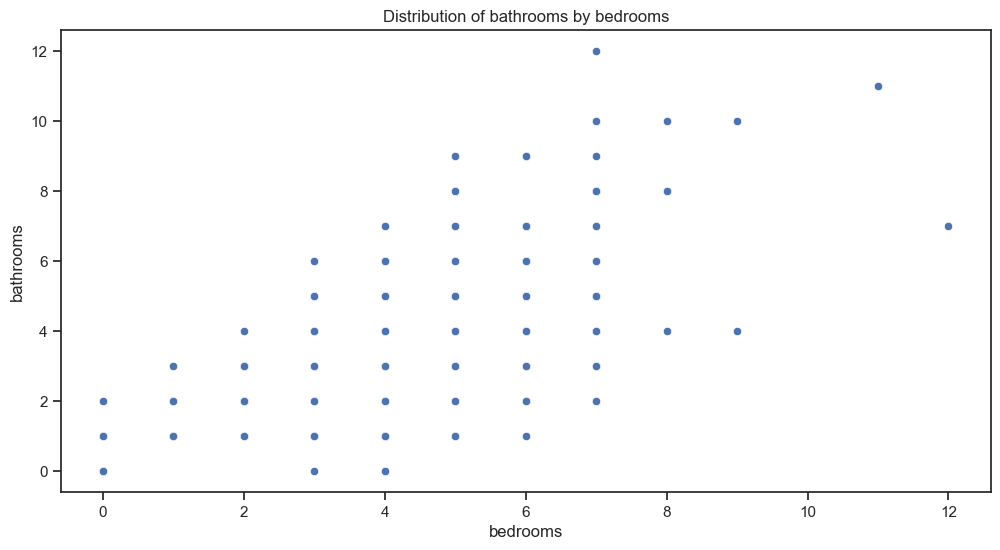

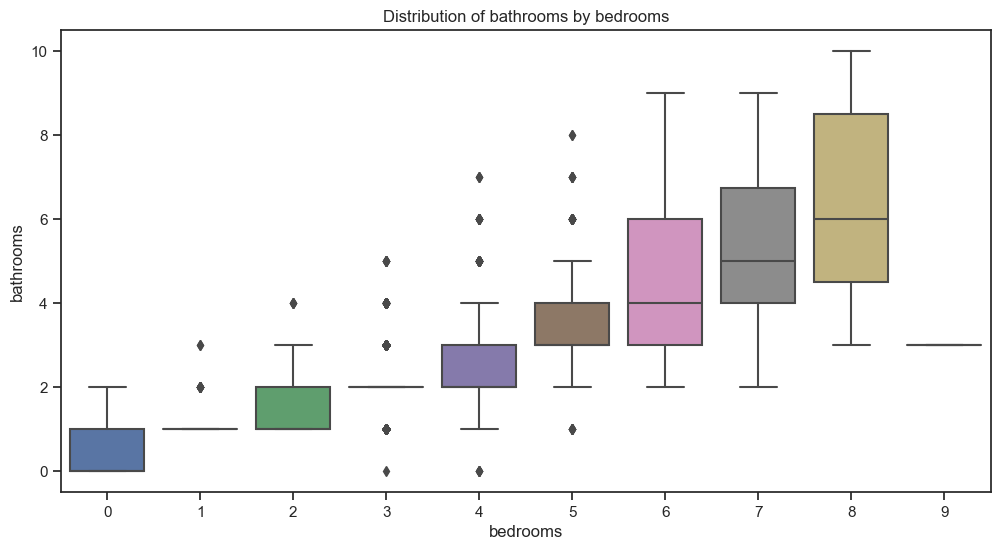

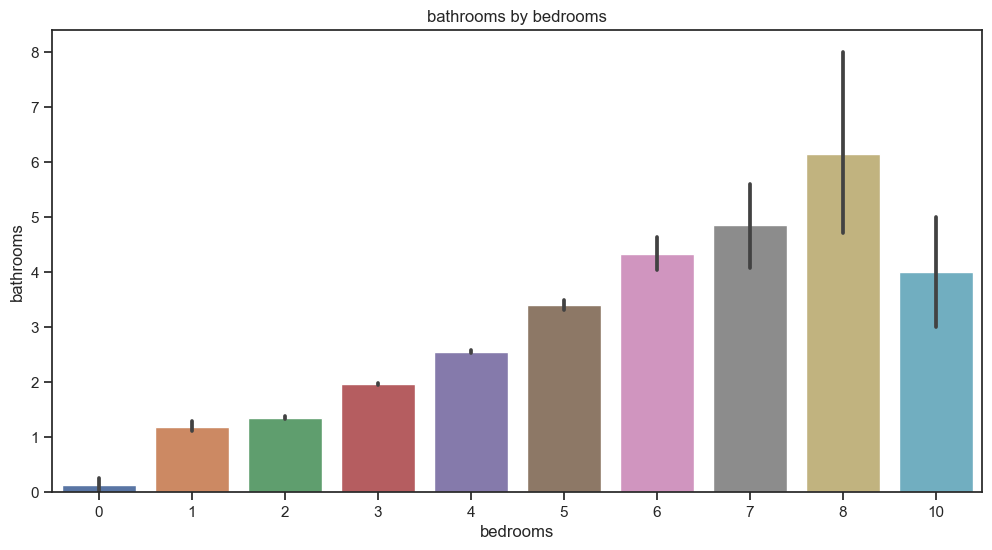

In [27]:
#Calling the plot_categorical_and_continuous_vars function to visualize the relationship betweem bedrooms and tax_value
plot_categorical_and_continuous_vars(train, categorical_col = 'bedrooms', continuous_col = 'bathrooms')

In [28]:
#performing a pearsonr to test the correlation between bedrooms and tax_value
correlation, p = stats.pearsonr(train['bedrooms'], train['bathrooms'])
correlation, p

(0.633261064539393, 0.0)

The correlation value suggests a moderate positive linear relationship between the two variables while the p value suggests that the observed correlation is statistically significant.

In [29]:
#Calling the hypothesis_test function to test the value of p
hypothesis_test(p)

we reject the null, there is a relationship.


### 3rd Hypothesis

Does fips affect tax_value

Null hypothesis: Fips does not have a relationship with tax_value.  
Alternative hypothesis: Fips does have a relationship with tax_value.

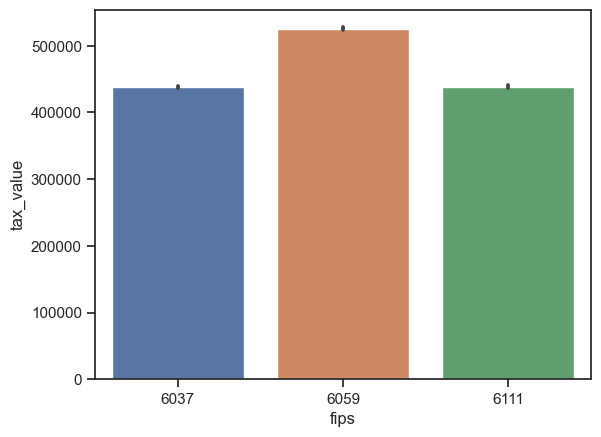

In [30]:
#Creating a barplot to visualize the relationship between fips and tax_value
sns.barplot(data=train, x='fips', y='tax_value')
plt.show()

In [31]:
# Separate tax_value by the three fips categories
fips_6037 = df['tax_value'][df['fips'] == 6037]
fips_6111 = df['tax_value'][df['fips'] == 6111]
fips_6059 = df['tax_value'][df['fips'] == 6059]

# Perform one-way ANOVA
f, p = stats.f_oneway(fips_6037, fips_6111, fips_6059)

In [32]:
hypothesis_test(p)

we reject the null, there is a relationship.


The extremely low p value suggests that there is a significant difference in the mean tax values among the three categories of the fips.